In [1]:
import pandas as pd
import numbers as np

x = pd.read_csv("PatientCorePopulatedTable.txt", sep='\t',
na_values = ['Unknown'], infer_datetime_format = True, parse_dates = ['PatientDateOfBirth'])

In [2]:
x['PatientGender'] = x['PatientGender'].str.upper() 
x['PatientRace'] = x['PatientRace'].str.upper() 
x['PatientMaritalStatus'] = x['PatientMaritalStatus'].str.upper() 
x['PatientLanguage'] = x['PatientLanguage'].str.upper() 
x.head() 

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,3A3C2AFB-FFFA-4E69-B4E6-73C1245D5D12,MALE,1975-01-04 14:49:59.587,WHITE,SINGLE,NaN,15.6
1,801AFB51-036F-40E3-BDFE-FED4844BE275,MALE,1964-09-06 13:15:43.043,WHITE,NaN,ENGLISH,13.23
2,366B0CC6-18AC-45DD-9AD4-BE884FE3A299,FEMALE,1953-01-14 06:00:19.330,WHITE,MARRIED,ENGLISH,12.11
3,DBB78149-D86C-435E-82C4-341999FD0719,FEMALE,1986-04-28 12:42:02.007,NaN,NaN,NaN,95.8
4,2C6269F4-71F8-4C07-A905-C08E9A3524C2,FEMALE,1963-08-26 10:57:55.183,WHITE,NaN,ENGLISH,18.08


In [3]:
import autocorrect
import math
from autocorrect import spell
#Autocorrect words Aslan not working as word
x['PatientMaritalStatus'] = x['PatientMaritalStatus'].astype('str')
x.PatientMaritalStatus.apply(lambda y : ("".join([spell(i) for i in y.split()])))

x['PatientGender'] = x['PatientGender'].astype('str')
x.PatientMaritalStatus.apply(lambda y : ("".join([spell(i) for i in y.split()])))

x['PatientRace'] = x['PatientRace'].astype('str')
x.PatientMaritalStatus.apply(lambda y : ("".join([spell(i) for i in y.split()])))

x['PatientLanguage'] = x['PatientLanguage'].astype('str')
x.PatientMaritalStatus.apply(lambda y : ("".join([spell(i) for i in y.split()])))
x.head()

,PatientID,PatientGender,PatientDateOfBirth,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty
0,3A3C2AFB-FFFA-4E69-B4E6-73C1245D5D12,MALE,1975-01-04 14:49:59.587,WHITE,SINGLE,nan,15.6
1,801AFB51-036F-40E3-BDFE-FED4844BE275,MALE,1964-09-06 13:15:43.043,WHITE,nan,ENGLISH,13.23
2,366B0CC6-18AC-45DD-9AD4-BE884FE3A299,FEMALE,1953-01-14 06:00:19.330,WHITE,MARRIED,ENGLISH,12.11
3,DBB78149-D86C-435E-82C4-341999FD0719,FEMALE,1986-04-28 12:42:02.007,nan,nan,nan,95.8
4,2C6269F4-71F8-4C07-A905-C08E9A3524C2,FEMALE,1963-08-26 10:57:55.183,WHITE,nan,ENGLISH,18.08


In [4]:
# x['PatientGender'] = x.PatientGender.astype('category')
# x['PatientRace'] = x.PatientRace.astype('category')
# x['PatientMaritalStatus'] = x.PatientMaritalStatus.astype('category')
# x['PatientLanguage'] = x.PatientLanguage.astype('category')
# x['PatientPopulationPercentageBelowPoverty'] = (pd.to_numeric(x['PatientPopulationPercentageBelowPoverty'], errors='coerce'))

In [5]:
x.loc[x['PatientGender'] == 'female', 'PatientGender'] = 'Female'

x.loc[x['PatientRace'] == 'Aslan', 'PatientRace'] = 'Asian'

x.loc[x['PatientLanguage'] == 'Engrish', 'PatientLanguage'] = 'English'

In [6]:
# Calculate patient age
from datetime import datetime
x["PatientAge"] = (pd.Timestamp(datetime.now()) - x["PatientDateOfBirth"]).astype('<m8[Y]')

In [7]:
x['PatientGender'] = x.PatientGender.astype('category')
x['PatientRace'] = x.PatientRace.astype('category')
x['PatientMaritalStatus'] = x.PatientMaritalStatus.astype('category')
x['PatientLanguage'] = x.PatientLanguage.astype('category')
x['PatientPopulationPercentageBelowPoverty'] = (pd.to_numeric(x['PatientPopulationPercentageBelowPoverty'], errors='coerce'))

In [8]:
x = x.drop(['PatientDateOfBirth'], axis = 1)

In [9]:
addcore = pd.read_csv("AdmissionsCorePopulatedTable.txt", sep='\t', infer_datetime_format = True, parse_dates = ['AdmissionStartDate', 'AdmissionEndDate'])
addcore.head()

,PatientID,AdmissionID,AdmissionStartDate,AdmissionEndDate
0,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,1,1974-07-26 15:05:30.333,1974-07-30 22:27:44.987
1,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,2,1983-11-12 03:34:39.083,1983-11-30 19:05:54.040
2,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,3,1998-09-28 12:08:17.843,1998-10-08 12:56:31.233
3,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,4,1999-04-03 01:49:32.610,1999-04-09 14:04:29.210
4,43556DC2-BCFC-45A8-84C3-1D3E4A11B02F,5,2001-11-26 03:07:07.303,2001-12-01 08:22:03.783


In [10]:
addcore["AdmissionYear"] = pd.to_datetime(addcore["AdmissionStartDate"], format='%Y-%m-%d %H:%M:%S.%f').dt.year

# AdmissionEndDate has some bad values here so won't convert to a datetime natively
addcore["AdmissionEndDate"] = pd.to_datetime(addcore["AdmissionEndDate"], format='%Y-%m-%d %H:%M:%S.%f', errors = 'coerce')

addcore["DaysStayed"] =  addcore["AdmissionEndDate"]- addcore["AdmissionStartDate"]

addcore["DaysStayed"] = addcore["DaysStayed"].dt.days

addcore = addcore.drop(['AdmissionStartDate','AdmissionEndDate'], axis = 1)

In [11]:
x['PatientID'] = x['PatientID'].dropna()
addcore['PatientID'] = addcore['PatientID'].dropna()

In [12]:
patientadmits = pd.merge(x, addcore, how = 'left', left_on = ['PatientID'], right_on = ['PatientID'])

In [13]:
diag = pd.read_csv("AdmissionsDiagnosesCorePopulatedTable.txt", sep='\t')
diag = diag.drop(['PrimaryDiagnosisDescription'], axis = 1)
diag['PrimaryDiagnosisCode'] = diag.PrimaryDiagnosisCode.astype('category')

In [14]:
corediag = pd.merge(diag, addcore, how = 'left', left_on = ['PatientID', 'AdmissionID'], right_on = ['PatientID', 'AdmissionID'])

In [15]:
corediag

,PatientID,AdmissionID,PrimaryDiagnosisCode,AdmissionYear,DaysStayed
0,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,1,E09.42,1983.0,13.0
1,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,2,O29.123,2001.0,12.0
2,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,3,M84.561,2012.0,19.0
3,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,1,G52.3,1953.0,14.0
4,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,2,C40.31,1974.0,10.0
5,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,3,C67.5,1991.0,11.0
6,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,4,O98.612,1994.0,10.0
7,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,5,Z13.85,2002.0,5.0
8,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,6,Z12.2,2005.0,5.0
9,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,7,Y71,2010.0,9.0


In [16]:
merged = pd.merge(corediag, x, how = 'left', left_on = ['PatientID'], right_on = ['PatientID'])

In [17]:
merged

,PatientID,AdmissionID,PrimaryDiagnosisCode,AdmissionYear,DaysStayed,PatientGender,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,PatientAge
0,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,1,E09.42,1983.0,13.0,FEMALE,WHITE,MARRIED,ENGLISH,15.37,59.0
1,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,2,O29.123,2001.0,12.0,FEMALE,WHITE,MARRIED,ENGLISH,15.37,59.0
2,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,3,M84.561,2012.0,19.0,FEMALE,WHITE,MARRIED,ENGLISH,15.37,59.0
3,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,1,G52.3,1953.0,14.0,FEMALE,ASIAN,DIVORCED,ENGLISH,12.04,93.0
4,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,2,C40.31,1974.0,10.0,FEMALE,ASIAN,DIVORCED,ENGLISH,12.04,93.0
5,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,3,C67.5,1991.0,11.0,FEMALE,ASIAN,DIVORCED,ENGLISH,12.04,93.0
6,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,4,O98.612,1994.0,10.0,FEMALE,ASIAN,DIVORCED,ENGLISH,12.04,93.0
7,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,5,Z13.85,2002.0,5.0,FEMALE,ASIAN,DIVORCED,ENGLISH,12.04,93.0
8,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,6,Z12.2,2005.0,5.0,FEMALE,ASIAN,DIVORCED,ENGLISH,12.04,93.0
9,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,7,Y71,2010.0,9.0,FEMALE,ASIAN,DIVORCED,ENGLISH,12.04,93.0


In [18]:
# merged.to_csv('C:\\Users\\dveka\\OneDrive\\Desktop\\GOSHDRE\\data\\OriginalData\\clean.csv')

In [19]:
import pandas as pd
merged = pd.read_csv("clean.csv")
merged['PatientGender'] = merged.PatientGender.astype('category')
merged['PatientRace'] = merged.PatientRace.astype('category')
merged['PatientMaritalStatus'] =merged.PatientMaritalStatus.astype('category')
merged['PatientLanguage'] = merged.PatientLanguage.astype('category')
merged['PrimaryDiagnosisCode'] = merged.PrimaryDiagnosisCode.astype('category')
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36143 entries, 0 to 36142
Data columns (total 12 columns):
Unnamed: 0                                 36143 non-null int64
PatientID                                  36143 non-null object
AdmissionID                                36143 non-null int64
PrimaryDiagnosisCode                       36143 non-null category
AdmissionYear                              36141 non-null float64
DaysStayed                                 36140 non-null float64
PatientGender                              36136 non-null category
PatientRace                                31435 non-null category
PatientMaritalStatus                       33965 non-null category
PatientLanguage                            33962 non-null category
PatientPopulationPercentageBelowPoverty    36134 non-null float64
PatientAge                                 36136 non-null float64
dtypes: category(5), float64(4), int64(2), object(1)
memory usage: 2.2+ MB


In [38]:
#Set Gender Catagories
pg = pd.Categorical(merged['PatientGender'], categories=["Male", "Female", "Other"], ordered=False)
temp = pd.Series(pg)
merged['PatientGender'] = temp

#Set Marital Status Catagories
ms = pd.Categorical(merged['PatientMaritalStatus'], categories=["Single", "Married", "Divorced","nan"], ordered=False)
temp = pd.Series(ms)
merged['PatientMaritalStatus'] = temp
   
pr = pd.Categorical(merged['PatientRace'], categories=["White", "Asian", "African American","nan"], ordered=False)
temp = pd.Series(pr)
merged['PatientRace'] = temp


#Need Categories for Diag Code, Race, Language.
#Need to assign number to each

merged

,Unnamed: 0,PatientID,AdmissionID,PrimaryDiagnosisCode,AdmissionYear,DaysStayed,PatientGender,PatientRace,PatientMaritalStatus,PatientLanguage,PatientPopulationPercentageBelowPoverty,PatientAge
0,0,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,1,E09.42,1983.0,13.0,Female,White,Married,English,15.37,59.0
1,1,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,2,O29.123,2001.0,12.0,Female,White,Married,English,15.37,59.0
2,2,E74E9DF1-D8FD-41BC-8CDE-226CFE318E0B,3,M84.561,2012.0,19.0,Female,White,Married,English,15.37,59.0
3,3,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,1,G52.3,1953.0,14.0,Female,Asian,Divorced,English,12.04,93.0
4,4,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,2,C40.31,1974.0,10.0,Female,Asian,Divorced,English,12.04,93.0
5,5,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,3,C67.5,1991.0,11.0,Female,Asian,Divorced,English,12.04,93.0
6,6,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,4,O98.612,1994.0,10.0,Female,Asian,Divorced,English,12.04,93.0
7,7,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,5,Z13.85,2002.0,5.0,Female,Asian,Divorced,English,12.04,93.0
8,8,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,6,Z12.2,2005.0,5.0,Female,Asian,Divorced,English,12.04,93.0
9,9,3AB69ECE-65F4-4D04-9E87-54E73C2DB4A8,7,Y71,2010.0,9.0,Female,Asian,Divorced,English,12.04,93.0


In [32]:
merged.PatientRace.value_counts()

White               17755
Asian                8277
African American     5403
nan                     0
Name: PatientRace, dtype: int64

In [33]:
merged.PatientGender.value_counts()

Female    18876
Male      17260
Other         0
Name: PatientGender, dtype: int64

In [40]:
merged.PatientMaritalStatus.value_counts()

Married     16190
Single      11679
Divorced     3950
NAN             0
Name: PatientMaritalStatus, dtype: int64

In [39]:
merged.PatientLanguage.value_counts()

English      23137
Spanish       6436
Icelandic     4389
Name: PatientLanguage, dtype: int64

In [25]:
import matplotlib.pyplot as plt
merged.AdmissionYear.hist(bins = 70, rwidth = 0.9, grid = True)
plt.title('Admissions by year')
plt.xlabel('Year')
plt.ylabel('Counts')
plt.xlim(1950)

(1950, 2027.2857857142856)

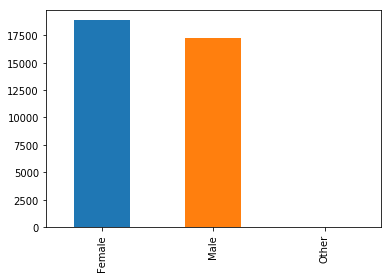

In [26]:
import matplotlib.pyplot as plt
pd.value_counts(merged["PatientGender"]).plot.bar()

In [27]:
import matplotlib.pyplot as plt
merged.PatientAge.hist(bins = 35, rwidth = 0.9, grid = True)
plt.title('Age counts')
plt.xlabel('Age ban
           ds')
plt.ylabel('Counts')

SyntaxError: EOL while scanning string literal (<ipython-input-27-249df6496f41>, line 4)

In [ ]:
plt.matshow(merged.corr())
plt.xticks(range(len(merged.columns)))
plt.yticks(range(len(merged.columns)), merged.columns)
plt.colorbar()
plt.show()

In [ ]:
merged.info()